# Image classification using transfer learning

## Setup

First, make sure that you have installed Keras on your computer.

In [52]:
# Code adapted from https://towardsdatascience.com/transfer-learning-using-keras-d804b2e04ef8
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Input, Activation
from keras.applications.resnet50 import ResNet50
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras import backend as k
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
import os
import tensorflow as tf

In [2]:
def plotting_curves(hist,num_epochs):
    #Getting history
    training_loss=hist.history['loss']
    validation_loss=hist.history['val_loss']
    epochs=range(num_epochs)

    #Plotting training and validation curves
    plt.plot(epochs,training_loss)
    plt.plot(epochs,validation_loss)

    #Displaying plot
    plt.xlabel('number of Epochs')
    plt.ylabel('loss')
    plt.title('Model Loss')
    plt.grid(True)
    plt.legend(['training','validation'])
    plt.style.use('seaborn')
    plt.show()
    
    #Getting history
    training_acc=hist.history['acc']
    validation_acc=hist.history['val_acc']
    epochs=range(num_epochs)

    #Plotting training and validation curves
    plt.plot(epochs, training_acc)
    plt.plot(epochs, validation_acc)

    #Displaying plot
    plt.xlabel('number of Epochs')
    plt.ylabel('accuracy')
    plt.title('Model Accuracy')
    plt.grid(True)
    plt.legend(['training','validation'])
    plt.style.use('seaborn')
    plt.show()

In [3]:
def test_scores(model):
    scores = model.evaluate(X_test, Y_test, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])

In [4]:
def plotting_matrix(model):
    prediction=model.predict(X_test)

    #Returns the indices of the maximum values along an axis.
    test=np.argmax(Y_test, 1)
    pred=np.argmax(prediction, 1)

    #confusion matrix to table prediction vs actual
    conf_matrix = confusion_matrix(test, pred)
    print(conf_matrix)
    
    #Displays Matrix
    plt.matshow(conf_matrix, cmap=plt.cm.gray)
    plt.show()
    
    #focusing the plot on errors
    row_sums = conf_matrix.sum(axis=1, keepdims=True)

    #dividing each value in the confusion matrix by the number of images in corresponding classes
    norm_conf_mx = conf_matrix / row_sums

    #filling the diagonal with zeros to keep only the errors
    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()

## Classifying images using a pretrained (on ImageNet) model (ResNet50)

In [2]:
# Code adapted from https://keras.io/applications/#resnet50

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 230, 230, 3)   0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        zero_padding2d_1[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

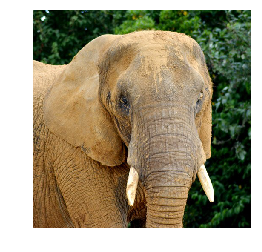

Predicted: [('n02504458', 'African_elephant', 0.8756842), ('n01871265', 'tusker', 0.073502518), ('n02504013', 'Indian_elephant', 0.050809417)]


In [3]:
# Code adapted from https://keras.io/applications/#resnet50

#image available on Canvas
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#displaying Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

#getting the prediction of the image
preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

## Load (and split) the dataset

In [81]:
# Code adapted from https://keras.io/datasets/         and 
# https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
#converting and normalizing pixel intensity value
X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255

# convert class labels to binary class labels
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Visualizing a sample of the CIFAR-10 dataset

In [8]:
# See code at https://github.com/rnoxy/cifar10-cnn/blob/master/CIFAR10-visualization.ipynb
# and
# http://parneetk.github.io/blog/cnn-cifar10/
# for ideas

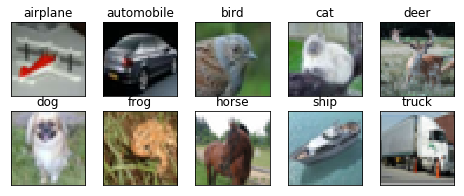

In [84]:
#filling the variables
num_train, img_channels, img_rows, img_cols =  x_train.shape
num_test, _, _, _ =  x_test.shape
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

#creating display structure
fig = plt.figure(figsize=(8,3))

#displaying 10 images 1 for each class
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

## Classifying images using a CNN built from scratch ("Solution 1")

In [8]:
# Code adapted from https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

#setting fit parameters
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#creates a linear stack of layers
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#converting and normalizng to pixel intensity value
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#fitting the model
print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 293s - loss: 1.8320 - acc: 0.3318 - val_loss: 1.5381 - val_acc: 0.4482
Epoch 2/10
50000/50000 [==============================] - 291s - loss: 1.5079 - acc: 0.4551 - val_loss: 1.3889 - val_acc: 0.5026
Epoch 3/10
50000/50000 [==============================] - 288s - loss: 1.3680 - acc: 0.5096 - val_loss: 1.3174 - val_acc: 0.5338
Epoch 4/10
50000/50000 [==============================] - 255s - loss: 1.2654 - acc: 0.5500 - val_loss: 1.1900 - val_acc: 0.5787
Epoch 5/10
50000/50000 [==============================] - 254s - loss: 1.1835 - acc: 0.5797 - val_loss: 1.0907 - val_acc: 0.6176
Epoch 6/10
50000/50000 [==============================] - 925s - loss: 1.1185 - acc: 0.6078 - val_loss: 1.0751 - val_acc: 0.6209
Epoch 7/10
50000/50000 [==============================] - 295s - loss: 1.0

## Performing data augmentation and evaluate its performance on the CIFAR-10 test set

In [22]:
#same CNN structure as solution 2 to compare the difference
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10))
model2.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#This fit was useless because I was supposed to use the fit_generator below
print('Using data augmentation.')
model2.fit(X_train, Y_train,
          batch_size=32,
          epochs=10,
          validation_data=(X_test, Y_test),
          shuffle=True)

Using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 372s 7ms/step - loss: 1.8089 - acc: 0.3344 - val_loss: 1.5465 - val_acc: 0.4482
Epoch 2/10
50000/50000 [==============================] - 361s 7ms/step - loss: 1.5061 - acc: 0.4524 - val_loss: 1.3494 - val_acc: 0.5221
Epoch 3/10
50000/50000 [==============================] - 360s 7ms/step - loss: 1.3662 - acc: 0.5122 - val_loss: 1.2341 - val_acc: 0.5653
Epoch 4/10
50000/50000 [==============================] - 362s 7ms/step - loss: 1.2642 - acc: 0.5511 - val_loss: 1.2831 - val_acc: 0.5623
Epoch 5/10
50000/50000 [==============================] - 360s 7ms/step - loss: 1.1838 - acc: 0.5833 - val_loss: 1.1076 - val_acc: 0.6135
Epoch 6/10
50000/50000 [==============================] - 366s 7ms/step - loss: 1.1143 - acc: 0.6091 - val_loss: 1.0283 - val_acc: 0.6394
Epoch 7/10
50000/50000 [==============================] - 362s 7ms/step - loss: 1.0590 - acc: 0.6

In [23]:
#width/height_shift-randomly translating pictures
#zoom-randomly zooming
#horizontal_flip-randomly flipping half of the image
#fill_mode-filling newly created pixels.
data_gen=ImageDataGenerator(width_shift_range=.2,
                           height_shift_range=.2,
                           zoom_range=.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

data_gen_model=model2.fit_generator(data_gen.flow(X_train, Y_train, batch_size=128),
                                  samples_per_epoch=x_train.shape[0], nb_epoch=12,
                                  validation_data=(X_test, Y_test),verbose=1)

# Score trained model.
scores = model2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

C:\Users\Mine\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Users\Mine\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=12)`
  from ipykernel import kernelapp as app


Epoch 1/12
390/390 [==============================] - 332s 851ms/step - loss: 1.2963 - acc: 0.5390 - val_loss: 1.0394 - val_acc: 0.6396
Epoch 2/12
390/390 [==============================] - 328s 840ms/step - loss: 1.2548 - acc: 0.5534 - val_loss: 1.0672 - val_acc: 0.6318
Epoch 3/12
390/390 [==============================] - 328s 840ms/step - loss: 1.2266 - acc: 0.5636 - val_loss: 1.0757 - val_acc: 0.6281
Epoch 4/12
390/390 [==============================] - 327s 839ms/step - loss: 1.2112 - acc: 0.5689 - val_loss: 1.0276 - val_acc: 0.6413
Epoch 5/12
390/390 [==============================] - 328s 842ms/step - loss: 1.1961 - acc: 0.5735 - val_loss: 0.9698 - val_acc: 0.6559
Epoch 6/12
390/390 [==============================] - 330s 846ms/step - loss: 1.1776 - acc: 0.5826 - val_loss: 1.0641 - val_acc: 0.6321
Epoch 7/12
390/390 [==============================] - 328s 841ms/step - loss: 1.1666 - acc: 0.5855 - val_loss: 0.9931 - val_acc: 0.6516
Epoch 8/12
390/390 [============================

## Using a pretrained CNN model in which an appropriate (fully-connected) layer's activations are used as features, which are then used by a conventional machine learning classifier

In [24]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

#creating the base VGG19 model including the fully connected layers
base_model = VGG19(weights='imagenet')
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

The code below uses a VGG19 pre-trained on ImageNet and builds a model whose output is the output of the 'fc2' layer of the original (base) model.  

It then demonstrates how one can run an image through the network and extract a (4096-D) feature vector, effectively using the pre-trained CNN as a "de luxe feature extraction step."

In [25]:
#creating the model with the base_model inputs and the output of the fc2 from the base_model
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

#preparing the image to be used for prediction
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#extracting the 4096-D feature vector
fc2_features = model.predict(x)
fc2_features.shape

(1, 4096)

In [27]:
from keras.applications.vgg19 import VGG19

#Get back the convolutional part of a VGG network trained on ImageNet
vgg19 = VGG19(weights='imagenet', include_top=False)

#Create your own input format (here 3x200x200)
input = Input(shape=(32,32,3),name = 'image_input')

#Use the generated model 
vgg19_output = vgg19(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(vgg19_output)
x = Dense(4096, input_dim=25088, name='fc1')(x)
x = Dense(4096, input_dim=4096, name='fc2')(x)

#Create custom model 
model3 = Model(input=input, output=x)

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 32, 32, 3)         0         
_________________________________________________________________
vgg19 (Model)                multiple                  20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              2101248   
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
Total params: 38,906,944
Trainable params: 38,906,944
Non-trainable params: 0
_________________________________________________________________


C:\Users\Mine\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("fc...)`


In [30]:
#extracting the 4096-D feature vector
train_features=model3.predict(X_train)
train_features.shape

(50000, 4096)

In [31]:
# converting variable to array
training_features=np.asarray(train_features)
train_y=np.asarray(Y_train)

In [32]:
#creating the training and test sets with their lables
train_x, test_x, train_y, test_y = train_test_split(training_features, train_y, test_size=.3)

In [33]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(35000, 4096)
(15000, 4096)
(35000, 10)
(15000, 10)


In [34]:
from sklearn.neural_network import MLPClassifier

#using those features in the mlp classifier
mlp_clf=MLPClassifier()
mlp_clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [35]:
mlp_clf.score(test_x, test_y)

0.43093333333333333

## Writing code to use a pretrained CNN model with the proper modifications (and retraining) to one or more layers

In [21]:
from keras.applications.vgg19 import VGG19

#creating the VGG19 model without the fc layers included
vgg19 = VGG19(weights='imagenet', include_top=False)

#Creating custom input shape
input = Input(shape=(32,32,3),name = 'image_input')

#Use the generated model 
vgg19_output = vgg19(input)

#Add the fully-connected layers and classification layer
x = Flatten(name='flatten')(vgg19_output)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)

#Create the final model 
model4 = Model(input=input, output=x)

model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 32, 32, 3)         0         
_________________________________________________________________
vgg19 (Model)                multiple                  20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              2101248   
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 10)                40970     
Total params: 38,947,914
Trainable params: 38,947,914
Non-trainable params: 0
________________________________________________________________

C:\Users\Mine\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`


In [22]:
#Freezing all the convolutional layers except last 4 so they are untrainable
for layer in model4.layers[:-4]:
    layer.trainable = False

#displaying the trainable layers
for layer in model4.layers:
    print(layer, layer.trainable)

<keras.engine.topology.InputLayer object at 0x0000022E0658E2B0> False
<keras.engine.training.Model object at 0x0000022E019E7518> False
<keras.layers.core.Flatten object at 0x0000022E019F41D0> True
<keras.layers.core.Dense object at 0x0000022E01A29E10> True
<keras.layers.core.Dense object at 0x0000022E01AD6CF8> True
<keras.layers.core.Dense object at 0x0000022E04C96EB8> True


In [23]:
model4.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [22]:
history4 = model4.fit(X_train, Y_train, epochs=10, batch_size=128,validation_data=(X_test,Y_test), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2722s 54ms/step - loss: 1.4164 - acc: 0.5065 - val_loss: 1.2745 - val_acc: 0.5496
Epoch 2/10
50000/50000 [==============================] - 2713s 54ms/step - loss: 1.1880 - acc: 0.5793 - val_loss: 1.2076 - val_acc: 0.5755
Epoch 3/10
50000/50000 [==============================] - 2714s 54ms/step - loss: 1.1142 - acc: 0.6067 - val_loss: 1.2032 - val_acc: 0.5756
Epoch 4/10
50000/50000 [==============================] - 2709s 54ms/step - loss: 1.0572 - acc: 0.6252 - val_loss: 1.1406 - val_acc: 0.6077
Epoch 5/10
50000/50000 [==============================] - 33515s 670ms/step - loss: 0.9984 - acc: 0.6444 - val_loss: 1.1530 - val_acc: 0.6025
Epoch 6/10
50000/50000 [==============================] - 2729s 55ms/step - loss: 0.9408 - acc: 0.6671 - val_loss: 1.1771 - val_acc: 0.6031
Epoch 7/10
50000/50000 [==============================] - 2712s 54ms/step - loss: 0.8873 - acc: 0.6815 - val

In [25]:
scores = model4.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 427s 43ms/step
Test loss: 1.24748557358
Test accuracy: 0.6098


## Best Solution

In [38]:
# Code adapted from https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

#creates a linear stack of layers
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model5.add(Conv2D(32, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(Conv2D(64, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(128, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(Conv2D(128, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))

#training the model using adam, cross-entropy loss function and reporting accuracy
model5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#setting the data augmentation variables
data_gen=ImageDataGenerator(width_shift_range=.1,
                           height_shift_range=.1,
                           horizontal_flip=True)

#fitting the model based on the augmented data
data_gen_model=model5.fit_generator(data_gen.flow(X_train, Y_train, batch_size=32),
                                   samples_per_epoch=x_train.shape[0], nb_epoch=10,
                                   validation_data=(X_test, Y_test),verbose=1)

# Score trained model.
scores = model5.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])model5.summary()
print('Test accuracy:', scores[1])

C:\Users\msaim2014\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\msaim2014\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=1562, epochs=10)`


Epoch 1/10
1562/1562 [==============================] - 241s 154ms/step - loss: 1.7243 - acc: 0.3505 - val_loss: 1.3337 - val_acc: 0.5094
Epoch 2/10
1562/1562 [==============================] - 232s 149ms/step - loss: 1.3430 - acc: 0.5168 - val_loss: 1.1407 - val_acc: 0.5978
Epoch 3/10
1562/1562 [==============================] - 232s 149ms/step - loss: 1.2112 - acc: 0.5708 - val_loss: 1.1101 - val_acc: 0.6119
Epoch 4/10
1562/1562 [==============================] - 232s 149ms/step - loss: 1.1214 - acc: 0.6042 - val_loss: 0.9228 - val_acc: 0.6744
Epoch 5/10
1562/1562 [==============================] - 233s 149ms/step - loss: 1.0668 - acc: 0.6243 - val_loss: 0.9462 - val_acc: 0.6598
Epoch 6/10
1562/1562 [==============================] - 233s 149ms/step - loss: 1.0196 - acc: 0.6447 - val_loss: 0.8495 - val_acc: 0.7033
Epoch 7/10
1562/1562 [==============================] - 234s 150ms/step - loss: 0.9831 - acc: 0.6577 - val_loss: 0.8604 - val_acc: 0.7001
Epoch 8/10
1562/1562 [============

In [52]:
#displaying the layer details of the model
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_157 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_406 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_407 (Activation)  (None, 15, 15, 64)        0         
__________

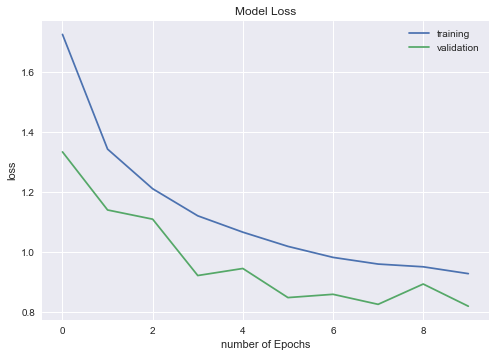

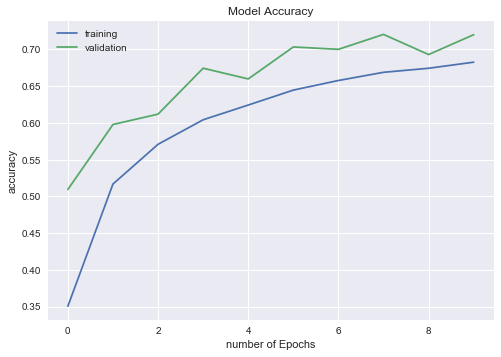

In [45]:
plotting_curves(data_gen_model,10)

[[787  54  11   8  16   4  11  22  23  64]
 [  1 926   0   2   1   4   3   2   5  56]
 [115  22 406  37  97 114 151  28   9  21]
 [ 33  17  29 349  81 227 168  46   8  42]
 [ 22   3  29  25 703  22 103  82   5   6]
 [ 10   9  14  85  64 694  63  47   1  13]
 [  6   7  13  21  18  13 913   6   0   3]
 [ 12   6   5  22  47  54  24 805   0  25]
 [ 78  79   2  10   7   2  17   8 740  57]
 [ 12  84   0   4   4   2   6   6   5 877]]


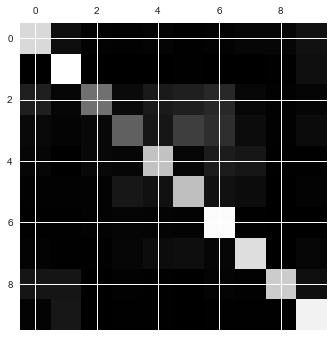

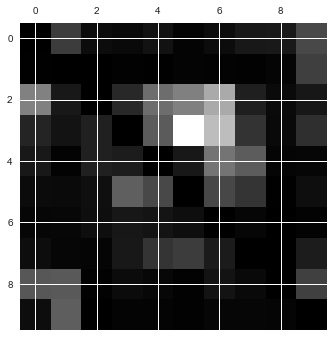

In [51]:
plotting_matrix(model5)